
**Kardiyovasküler hastalıklar** (KVH'ler),
WHO'na göre dünya genelinde her yıl tahminen 17.9 milyon insanın ölümüne yol açarak önde gelen ölüm nedenlerinden biridir.
Kardiyovasküler hastalıklar risk faktörleri şunlardır:

-Sigara kullanımı

-Stres

-Alkol kullanımı

-Yüksek kan basıncı

-Yüksek kolesterol

-Hareketsiz yaşam

-Obezite

-Diyabet

-Ailede kalp hastalığı geçmişi

-Etnik köken

-Cinsiyet (erkekler, kadınlardan daha erken kardiyovasküler hastalığa yakalanma eğilimindedir)

-Yaş (yaşlandıkça, kardiyovasküler hastalığa yakalanma olasılığınız artar)



Bu veri seti, Massachusetts eyaletindeki Framingham kasabasının sakinleri üzerinde yapılan bir kardiyovasküler çalışma ile ilgilidir. Veri setinin incelenme amacı hastaların 10 yıl içerisinde Kardiyovasküler Hastalık geliştirip geliştirmeyeceğinin doğru tahminlenmesidir.Veri seti, 4000'den fazla hastaya ait 15 özellik sunmaktadır.



Değişkenler:
• Cinsiyet: Erkek veya kadın (Nominal)

• Yaş: Hastanın yaşı; (Sürekli - Kaydedilen yaşlar tam sayılara
yuvarlanmış olsa da, yaş kavramı süreklidir)

Davranışsal:
• Mevcut Sigara İçicisi: Hastanın şu an sigara içip içmediği (Nominal)

• Günlük Sigara Miktarı: Kişinin bir günde ortalama içtiği sigara sayısı.
(Sürekli kabul edilebilir çünkü kişi herhangi bir sayıda sigara içebilir, hatta yarım sigara da olabilir.)

Medikal (Geçmiş)
• BP İlaçları: Hastanın kan basıncı ilacı kullanıp kullanmadığı (Nominal)
• Geçmişte İndirilmiş İnme: Hastanın daha önce inme geçirip geçirmediği (Nominal)
• Geçmişte Hipertansiyon: Hastanın hipertansiyon olup olmadığı (Nominal)
• Diyabet: Hastanın diyabeti olup olmadığı (Nominal)


Medikal (Şu Anki)
• Toplam Kolesterol: Toplam kolesterol seviyesi (Sürekli)
• Sistolik Kan Basıncı: Sistolik kan basıncı (Sürekli)
• Diyastolik Kan Basıncı: Diyastolik kan basıncı (Sürekli)
• Vücut Kitle İndeksi (BMI): Vücut Kitle İndeksi (Sürekli)
• Kalp Atış Hızı: Kalp atış hızı (Sürekli - Tıbbi araştırmalarda, kalp atış hızı gibi değişkenler aslında kesikli olsa da, çok sayıda olası değer olduğu için sürekli kabul edilir.)
• Glukoz: Glukoz seviyesi (Sürekli)

Tahmin Edilen Değişken (Hedef)
• 10 yıllık koroner kalp hastalığı (CHD) riski




In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_yolu = '/content/drive/MyDrive/framingham.csv'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


In [ ]:
df = pd.read_csv(dataset_yolu)

# **EDA**

In [ ]:
def check_df(df, head=5):
    print("##################### Shape #####################")
    print(df.shape)
    print("##################### Types #####################")
    print(df.dtypes)
    print("##################### Head #####################")
    print(df.head(head))
    print("##################### Tail #####################")
    print(df.tail(head))
    print("##################### NA #####################")
    print(df.isnull().sum())
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
pd.set_option('display.max_columns', None)  # Tüm sütunları göster
pd.set_option('display.max_rows', None)  # Tüm satırları göster

In [ ]:
check_df(df)

##################### Shape #####################
(4238, 16)
##################### Types #####################
male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object
##################### Head #####################
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   

In [ ]:
def cat_summary(df, col_name, plot=True):
  print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))

  print("##########################################")
  if plot:
    sns.countplot(x=df[col_name], data=df)
    plt.show()


In [ ]:
# Kategorik değişkenlerin listesini al
cat_cols = df.select_dtypes(include=['category']).columns

# Her kategorik değişken için cat_summary fonksiyonunu çalıştır
for col in cat_cols:
    cat_summary(df, col)

In [ ]:
def num_summary(df, numerical_col, plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(df[numerical_col].describe(quantiles).T)

  if plot:
    sns.histplot(df[numerical_col], kde=True)
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show(block=True)


In [ ]:
def target_summary_with_num(df, target, numerical_col):
  print(df.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [ ]:
def target_summary_with_cat(df, target, categorical_col):
  print(pd.DataFrame({"TARGET_MEAN": df.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [ ]:
def correlation_matrix(df, cols):
  fig = plt.gcf()
  fig.set_size_inches(15,10)
  plt.xticks(rotation=10)
  plt.yticks(rotation=10)
  fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={"size":11}, linecolor='w', cmap="RdBu")

  plt.show()

In [ ]:
def grab_col_names(df, cat_th=10, car_th=20):
  cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
  num_cols = [col for col in df.columns if df[col].dtypes != "O"]  # numerical columns
  cat_but_car = []  # Empty list for categorical but cardinal
  # Add logic to identify categorical but cardinal columns if needed

  return cat_cols, num_cols, cat_but_car # Explicitly return the three variables

Değişken Türlerinin Ayrıştırılması

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=4, car_th=20)

In [ ]:
num_cols

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [ ]:
len(num_cols)  # Get the number of numerical columns using len()

16

In [ ]:
cat_cols

[]

In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


glucose 394,  totchol 696

Nümerik değişkenlerin grafiğine
bakıyorum outlier tespiti ve veri setini anlamak için

count    4238.000000
mean        0.429212
std         0.495022
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         1.000000
70%         1.000000
80%         1.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: male, dtype: float64


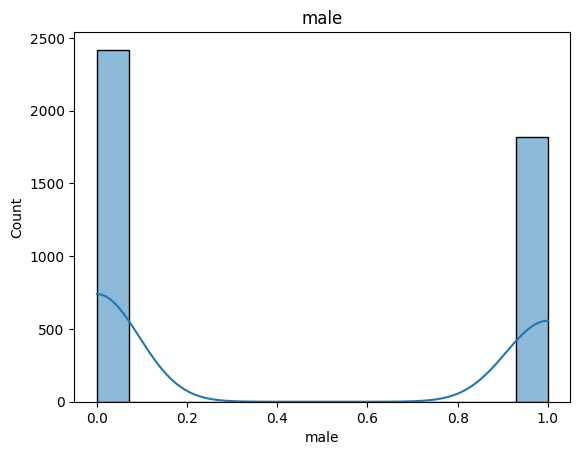

count    4238.000000
mean       49.584946
std         8.572160
min        32.000000
5%         37.000000
10%        39.000000
20%        41.000000
30%        44.000000
40%        46.000000
50%        49.000000
60%        52.000000
70%        55.000000
80%        58.000000
90%        62.000000
95%        64.000000
99%        67.000000
max        70.000000
Name: age, dtype: float64


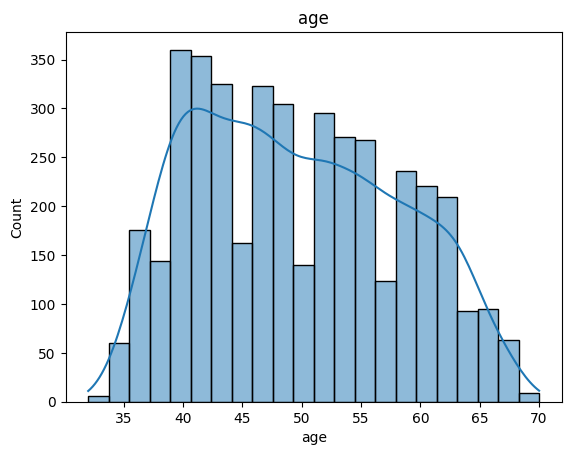

count    4133.000000
mean        1.978950
std         1.019791
min         1.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         2.000000
60%         2.000000
70%         2.000000
80%         3.000000
90%         4.000000
95%         4.000000
99%         4.000000
max         4.000000
Name: education, dtype: float64


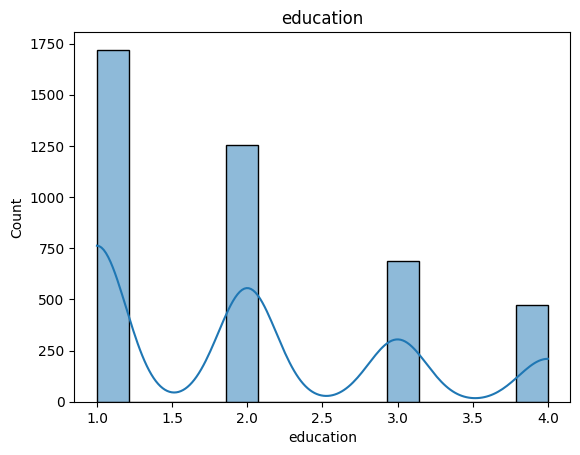

count    4238.000000
mean        0.494101
std         0.500024
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         1.000000
70%         1.000000
80%         1.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: currentSmoker, dtype: float64


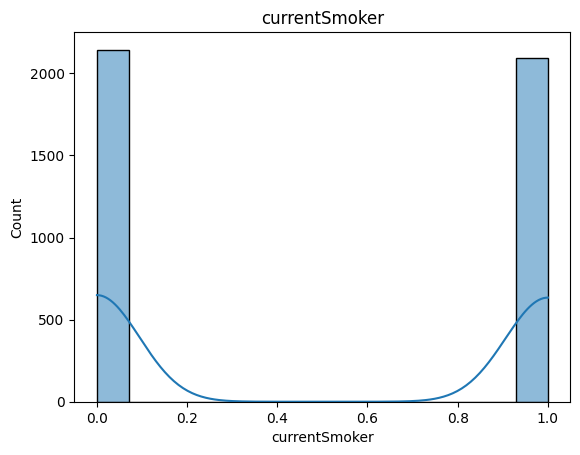

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         9.000000
70%        15.000000
80%        20.000000
90%        25.000000
95%        30.000000
99%        43.000000
max        70.000000
Name: cigsPerDay, dtype: float64


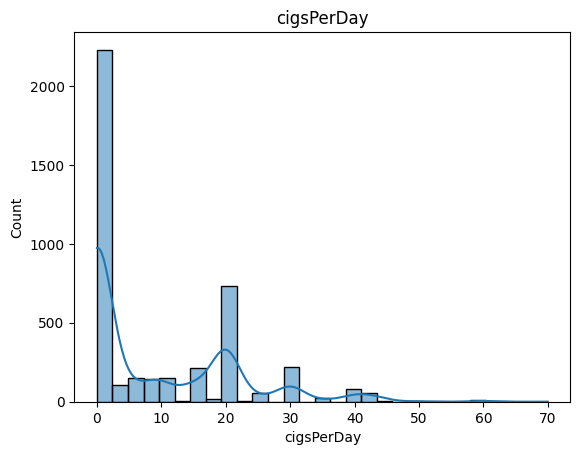

count    4185.000000
mean        0.029630
std         0.169584
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%         1.000000
max         1.000000
Name: BPMeds, dtype: float64


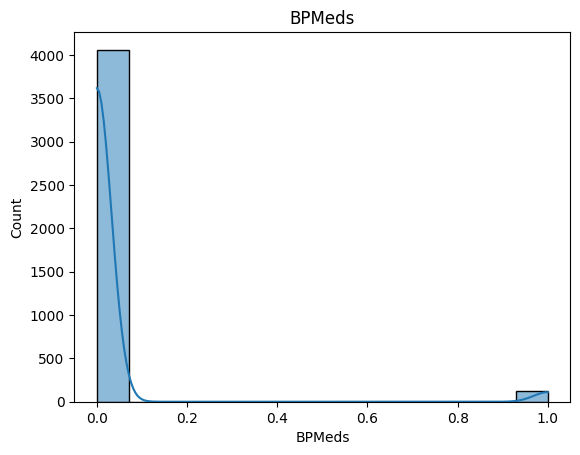

count    4238.000000
mean        0.005899
std         0.076587
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: prevalentStroke, dtype: float64


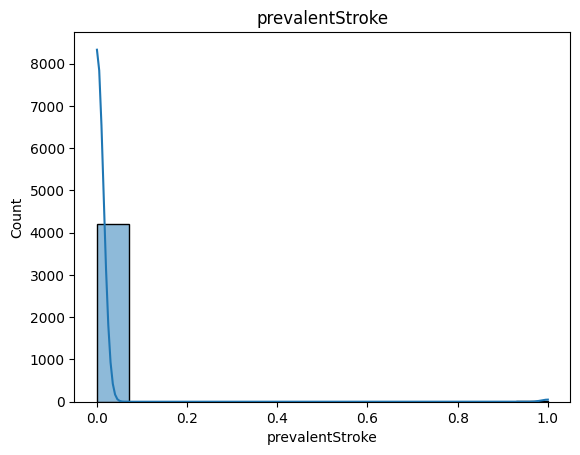

count    4238.000000
mean        0.310524
std         0.462763
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         1.000000
80%         1.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: prevalentHyp, dtype: float64


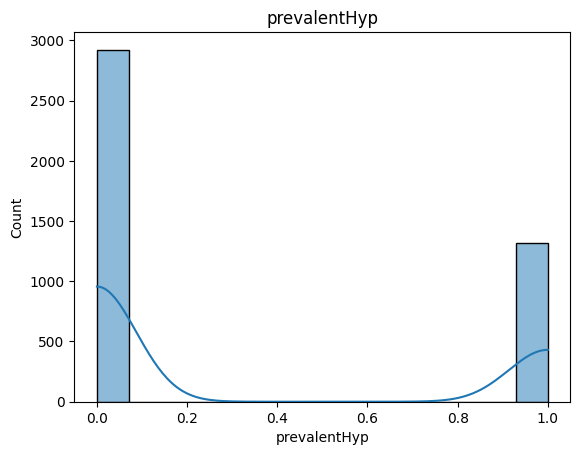

count    4238.000000
mean        0.025720
std         0.158316
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%         1.000000
max         1.000000
Name: diabetes, dtype: float64


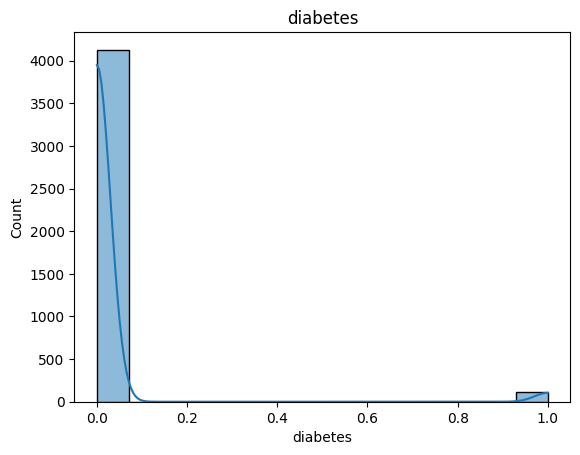

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
5%        170.000000
10%       183.000000
20%       200.000000
30%       212.000000
40%       223.000000
50%       234.000000
60%       244.000000
70%       257.000000
80%       271.000000
90%       292.000000
95%       312.000000
99%       354.130000
max       696.000000
Name: totChol, dtype: float64


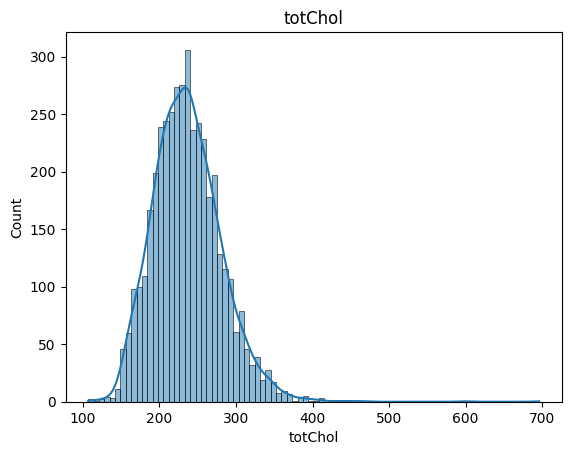

count    4238.000000
mean      132.352407
std        22.038097
min        83.500000
5%        104.000000
10%       108.850000
20%       114.000000
30%       119.500000
40%       124.000000
50%       128.000000
60%       133.000000
70%       140.000000
80%       148.000000
90%       162.000000
95%       175.000000
99%       200.000000
max       295.000000
Name: sysBP, dtype: float64


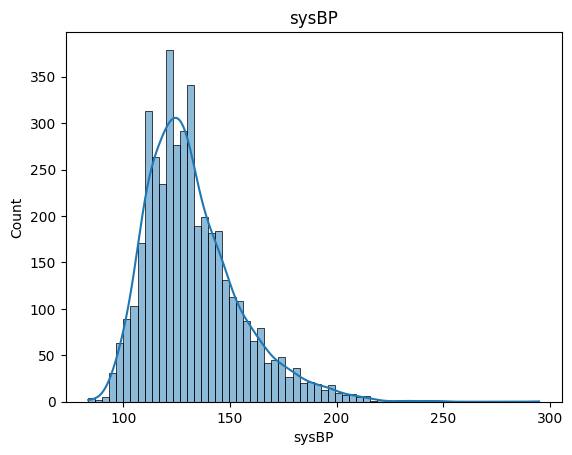

count    4238.000000
mean       82.893464
std        11.910850
min        48.000000
5%         66.000000
10%        69.000000
20%        73.000000
30%        76.000000
40%        80.000000
50%        82.000000
60%        85.000000
70%        87.500000
80%        92.000000
90%        98.000000
95%       104.575000
99%       118.000000
max       142.500000
Name: diaBP, dtype: float64


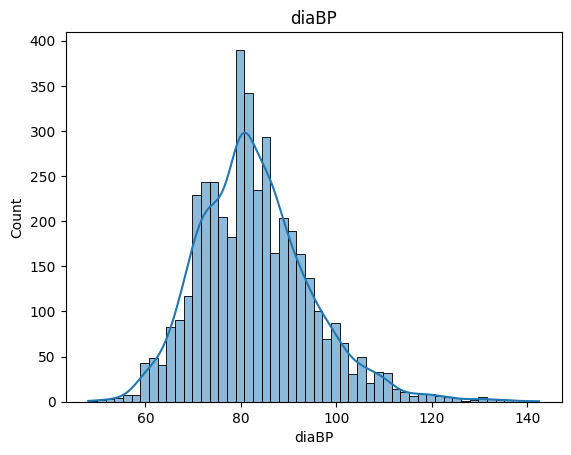

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
5%         20.060000
10%        21.088000
20%        22.530000
30%        23.564000
40%        24.470000
50%        25.400000
60%        26.350000
70%        27.420000
80%        28.690000
90%        30.770000
95%        32.782000
99%        38.956400
max        56.800000
Name: BMI, dtype: float64


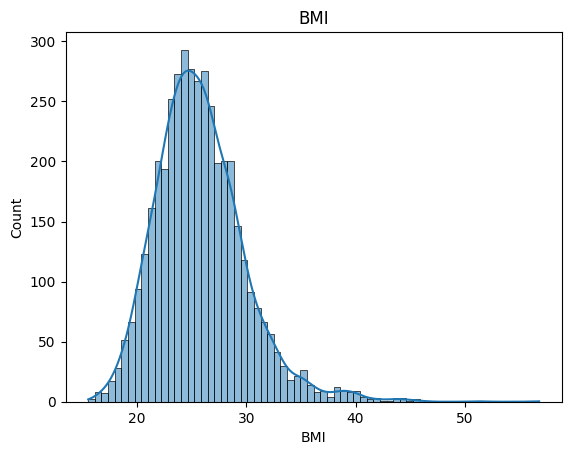

count    4237.000000
mean       75.878924
std        12.026596
min        44.000000
5%         60.000000
10%        60.000000
20%        65.000000
30%        70.000000
40%        72.000000
50%        75.000000
60%        77.000000
70%        80.000000
80%        85.000000
90%        92.000000
95%        98.000000
99%       110.000000
max       143.000000
Name: heartRate, dtype: float64


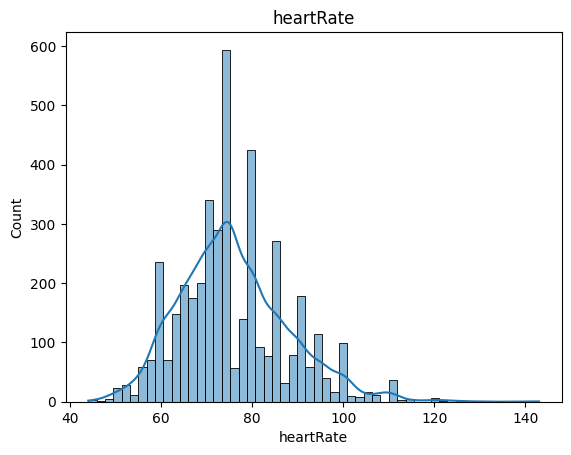

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
5%         62.000000
10%        65.000000
20%        70.000000
30%        73.000000
40%        75.000000
50%        78.000000
60%        81.000000
70%        85.000000
80%        89.000000
90%        98.000000
95%       108.550000
99%       175.040000
max       394.000000
Name: glucose, dtype: float64


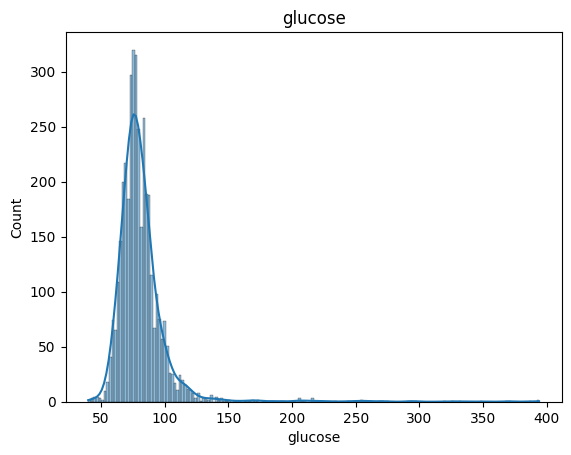

count    4238.000000
mean        0.151958
std         0.359023
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: TenYearCHD, dtype: float64


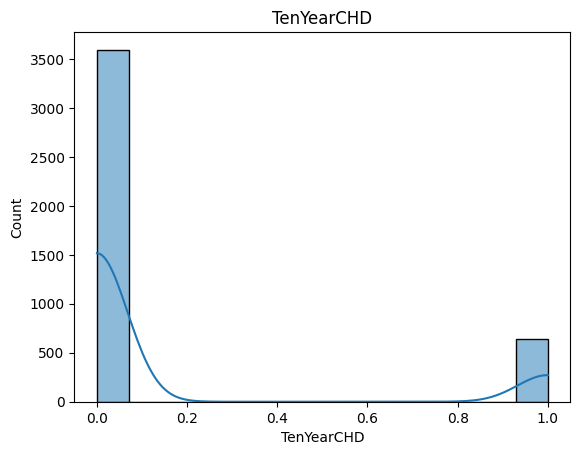

In [ ]:
for col in num_cols:
  num_summary(df, col, plot=True)

Sayısal değişkenlerin birbiri ile korelasyonu


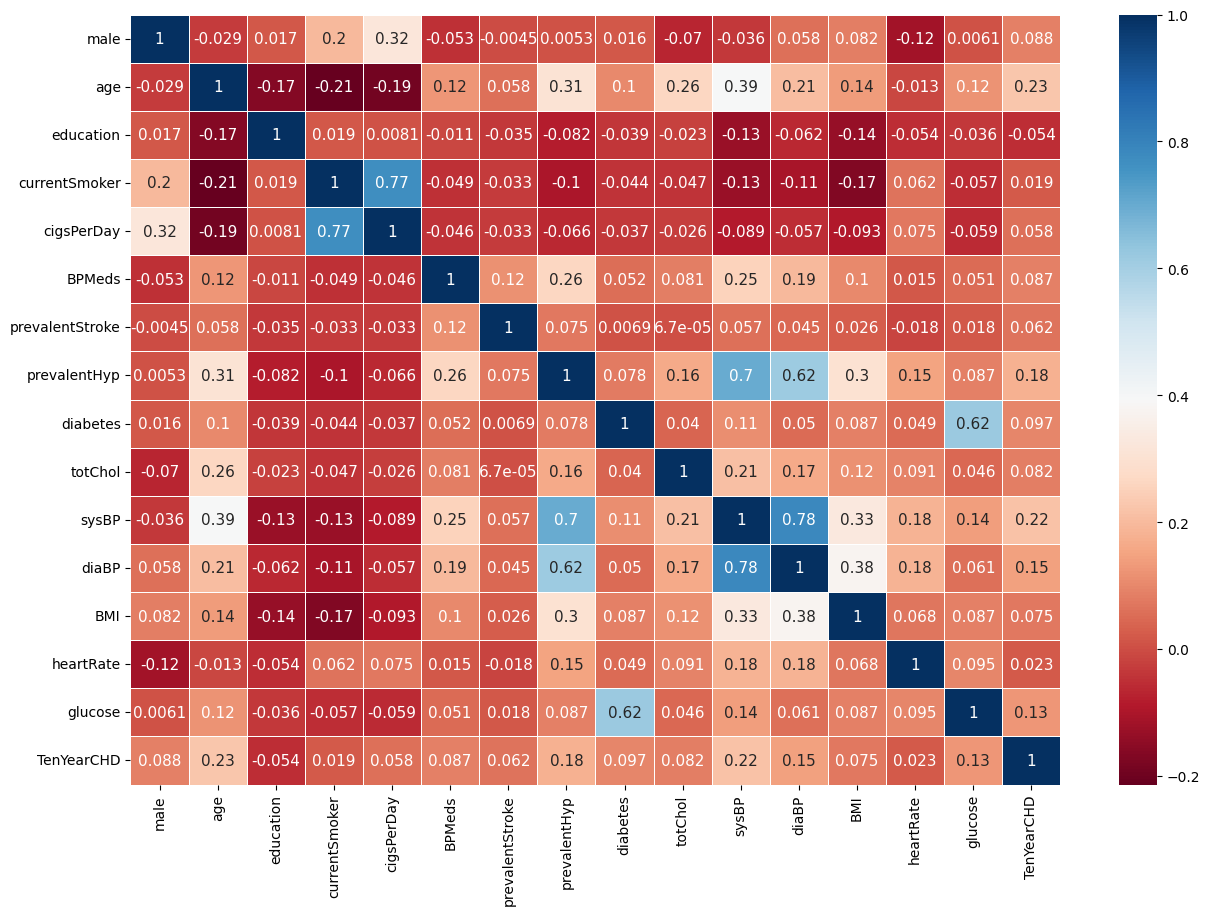

In [ ]:
correlation_matrix(df, num_cols)

cigsPerDay-currentSmoker
CurrenSmoker-CigsPerDay
sysBP-PrevalentHyp
diaBP-prevalentHYP
diabets-glucose
diabp-sysbp
prevalenthyp-sysbp
sysbp-diabp
prevalenthyp-diabp
diabets-glucose

Target ile sayısal değişkenlerin incelenmesi


In [ ]:
for col in num_cols:
  target_summary_with_num(df, "TenYearCHD", col)

                male
TenYearCHD          
0           0.410684
1           0.532609


                  age
TenYearCHD           
0           48.767668
1           54.145963


            education
TenYearCHD           
0            2.002282
1            1.848726


            currentSmoker
TenYearCHD               
0                0.489983
1                0.517081


            cigsPerDay
TenYearCHD            
0             8.710401
1            10.629283


              BPMeds
TenYearCHD          
0           0.023367
1           0.064771


            prevalentStroke
TenYearCHD                 
0                  0.003895
1                  0.017081


            prevalentHyp
TenYearCHD              
0               0.275737
1               0.504658


            diabetes
TenYearCHD          
0           0.019199
1           0.062112


               totChol
TenYearCHD            
0           235.172530
1           245.388976


                 sysBP
TenYearCHD            
0     

# **DATA PRE PROCESSİNG**

In [ ]:
def outlier_thresholds(df, col_name, q1=0.25, q3=0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def replace_with_thresholds(df, variable):
    low_limit, up_limit = outlier_thresholds(df, variable)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit

In [ ]:
def check_outlier(df, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(df, col_name, q1, q3)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
def one_hot_encoder(df, categorical_cols, drop_first=False):
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=drop_first)
    return df

In [ ]:
df['New_glucose_cat'] = pd.cut(x=df['glucose'], bins=[-1, 139, 200], labels=['normal', 'prediabetes'])

In [ ]:
df['New_Smoker_Level'] = pd.cut(x=df['cigsPerDay'], bins=[-1, 1 ,10, 40, 71], labels=['Non-Smoker', 'Less Smoker ', 'Problematic Smoker', 'Smoke Issue'])

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,New_glucose_cat,New_Smoker_Level
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,normal,Non-Smoker
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,normal,Non-Smoker
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,normal,Problematic Smoker
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,normal,Problematic Smoker
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,normal,Problematic Smoker


In [ ]:
check_df(df)

##################### Shape #####################
(4238, 18)
##################### Types #####################
male                   int64
age                    int64
education            float64
currentSmoker          int64
cigsPerDay           float64
BPMeds               float64
prevalentStroke        int64
prevalentHyp           int64
diabetes               int64
totChol              float64
sysBP                float64
diaBP                float64
BMI                  float64
heartRate            float64
glucose              float64
TenYearCHD             int64
New_glucose_cat     category
New_Smoker_Level    category
dtype: object
##################### Head #####################
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0         

In [ ]:
cat_cols, cum_cals, cat_but_car = grab_col_names(df, cat_th=10, car_th=20)

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,New_glucose_cat,New_Smoker_Level
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,normal,Non-Smoker
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,normal,Non-Smoker
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,normal,Problematic Smoker
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,normal,Problematic Smoker
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,normal,Problematic Smoker


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   male              4238 non-null   int64   
 1   age               4238 non-null   int64   
 2   education         4133 non-null   float64 
 3   currentSmoker     4238 non-null   int64   
 4   cigsPerDay        4209 non-null   float64 
 5   BPMeds            4185 non-null   float64 
 6   prevalentStroke   4238 non-null   int64   
 7   prevalentHyp      4238 non-null   int64   
 8   diabetes          4238 non-null   int64   
 9   totChol           4188 non-null   float64 
 10  sysBP             4238 non-null   float64 
 11  diaBP             4238 non-null   float64 
 12  BMI               4219 non-null   float64 
 13  heartRate         4237 non-null   float64 
 14  glucose           3850 non-null   float64 
 15  TenYearCHD        4238 non-null   int64   
 16  New_glucose_cat   3816 n


cigsPerDay-currentSmoker
CurrenSmoker-CigsPerDay
sysBP-PrevalentHyp
diaBP-prevalentHYP
diabets-glucose
diabp-sysbp
prevalenthyp-sysbp
sysbp-diabp
prevalenthyp-diabp
diabets-glucose

In [ ]:
cat_cols

['male',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD',
 'New_glucose_cat',
 'New_Smoker_Level']

In [ ]:
def grab_col_names(df, cat_th=10, car_th=20):
    # Kategorik sütunlar
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    # Sayısal sütunlar
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    # Sayısal fakat kategorik olanlar
    num_but_cat = [col for col in num_cols if df[col].nunique() < cat_th]
    # Kategorik fakat kardinal olanlar
    cat_but_car = [col for col in cat_cols if df[col].nunique() > car_th]

    # Güncellenmiş liste
    cat_cols += num_but_cat
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Döndürme
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols

['male',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD',
 'New_glucose_cat',
 'New_Smoker_Level']

# **3. BASE MODELS**

In [ ]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [ ]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models...")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ##('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ##('LightGBM', LGBMClassifier())
                   ##catboost modeli çalışması uzun sürdüğü içi kullanmadım
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(X, y)


HistGradientBoostingClassifier()

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X, y)


HistGradientBoostingClassifier()

In [ ]:
import pandas as pd
print(pd.DataFrame(X).isnull().sum())  # Hangi sütunlarda eksik veri var?
print(pd.DataFrame(X).isnull().sum().sum())  # Toplam eksik değer sayısı


male                  0
age                   0
education           105
currentSmoker         0
cigsPerDay           29
BPMeds               53
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol              50
sysBP                 0
diaBP                 0
BMI                  19
heartRate             1
glucose             388
New_glucose_cat     422
New_Smoker_Level     29
dtype: int64
1096


In [ ]:
###kategorik bi değişkense modla doldurabiliriz nümerikte de meanle


In [ ]:
import xgboost
print(xgboost.__version__)


2.1.3


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Verileri ölçeklendirme

model = LogisticRegression(max_iter=500)  # İterasyon sayısını artırın
model.fit(X_scaled, y)



ValueError: could not convert string to float: 'normal'

In [ ]:
import pandas as pd
print(pd.DataFrame(X).isnull().sum())


In [ ]:
## tüm nulları doldurun mode ve mean ile!!

In [ ]:
#df['education'] = pd.to_numeric(df['education'], errors='coerce')



In [ ]:
#df['education'].fillna(df['education'].mean(), inplace=True)
"""for i in range(len(num_cols)):
    # Eksik değerleri sütunların ortalama değeri ile doldur
    df[num_cols[i]].fillna(df[num_cols[i]].mean(), inplace=True)
    # Eksik değer sayısını sütun adıyla birlikte yazdır
    print(f"{num_cols[i]} sütununda kalan eksik değer sayısı: {df[num_cols[i]].isnull().sum()}")
  ## tüm nulları doldurun mode ve mean ile!!"""
"""for i in range(len(num_cols)):
    #df['education'] = pd.to_numeric(df['education'], errors='coerce')#hepsi nümerik olduğu için doldurmaya nümeriğe çevirmeye gerek yok!
    df[num_cols[i]].fillna(df[num_cols[i]].mean(), inplace=True)
    print(df[num_cols[i]].isnull().sum() + num_cols[i] )"""


for i in range(len(num_cols)):
    # Eksik değerleri sütunların ortalama değeri ile doldur
    df[num_cols[i]].fillna(df[num_cols[i]].mean(), inplace=True)
    # Eksik değer sayısını sütun adıyla birlikte yazdır
    print(f"{num_cols[i]} sütununda kalan eksik değer sayısı: {df[num_cols[i]].isnull().sum()}")


df['New_glucose_cat'].fillna(df['New_glucose_cat'].mode()[0], inplace=True)
print(f"'New_glucose_cat' sütununda kalan eksik değer sayısı: {df['New_glucose_cat'].isnull().sum()}")
df['New_Smoker_Level'].fillna(df['New_Smoker_Level'].mode()[0], inplace=True)
print(f"'New_Smoker_Level' sütununda kalan eksik değer sayısı: {df['New_Smoker_Level'].isnull().sum()}")


male sütununda kalan eksik değer sayısı: 0
age sütununda kalan eksik değer sayısı: 0
education sütununda kalan eksik değer sayısı: 0
currentSmoker sütununda kalan eksik değer sayısı: 0
cigsPerDay sütununda kalan eksik değer sayısı: 0
BPMeds sütununda kalan eksik değer sayısı: 0
prevalentStroke sütununda kalan eksik değer sayısı: 0
prevalentHyp sütununda kalan eksik değer sayısı: 0
diabetes sütununda kalan eksik değer sayısı: 0
totChol sütununda kalan eksik değer sayısı: 0
sysBP sütununda kalan eksik değer sayısı: 0
diaBP sütununda kalan eksik değer sayısı: 0
BMI sütununda kalan eksik değer sayısı: 0
heartRate sütununda kalan eksik değer sayısı: 0
glucose sütununda kalan eksik değer sayısı: 0
TenYearCHD sütununda kalan eksik değer sayısı: 0
'New_glucose_cat' sütununda kalan eksik değer sayısı: 0
'New_Smoker_Level' sütununda kalan eksik değer sayısı: 0


<ipython-input-75-37197cc35172>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[num_cols[i]].fillna(df[num_cols[i]].mean(), inplace=True)
<ipython-input-75-37197cc35172>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
#df['education'].isnull().sum()

In [ ]:
from collections import Counter
print(Counter(y))  # Sınıfların dağılımını kontrol edin


Counter({0: 3594, 1: 644})


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


ValueError: Input contains NaN

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier())
])

scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=5, scoring='roc_auc')
print("Mean ROC-AUC:", scores.mean())


NameError: name 'X_resampled' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
base_models(X, y)


Base Models...


ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1222, in fit
    X, y = validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 832, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'normal'


en başarılı lojistik regresyon gibi görünüyor gelişmiş modellerin daha az başarılı olması şaşırtıcı

**AUTOMATED HYPERPARAMETER OPTİMİZATİON**

In [ ]:
knn_params = {"n_neighbors": range(2,50)}

In [ ]:
cart_params = {'max_depth': range(1,20),
               "min_samples_split": range(2,30)}

In [ ]:
rf_params = {"max_depth": [8, 15, None],
             "max_features": [5,7, "auto"],
             "min_samples_split": [15,20],
             "n_estimators": [200,300]}


In [ ]:
xgboost_params = {"learnin_rate": [0.1, 0.01],
                  "max_depth": [5,8],
                  "n_estimators": [100,200],
                  "colsample_bytree": [0.5, 1] }

In [ ]:
lightgpm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300,500],
                   }

modeller ve o modelde aranacak olan hiper parametreleri bir araya getiriyorum:

In [ ]:
classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ( "CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
]


In [ ]:
def best_models(X, y, cv=2, scoring="roc_auc"):
    print("Hyperparameter Optimization...")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

ilk blok : bir modelin cv hiperparametre optimizasyonundan önceki hatası


hiperparametre değerlerinin best skoralarıyla final model oluşturulmuş

final model raporlanmış ve hatsına bakılmış

```
# Bu, kod olarak biçimlendirilmiştir
```



In [ ]:
best_models(X, y)  # Change hyperparameter_optimization to best_models

NameError: name 'best_models' is not defined

# **STACKİNG & ENSEMBLE LEARNİNG & META LEARNİNG** /voting

tahmin performansını güçlendirmek için tüm yöntemleri bir araya getiriyorum

In [ ]:
def voting_classifier(best_models, X, y):
    print("Voting Classifier...")
    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]),
                                              ('RF', best_models["RF"])],
                                   voting='soft').fit(X, y)
    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf


In [ ]:
## roc auc eğrisi değinin!!

In [ ]:
def hyperparameter_optimization(X, y):
    best_models = {
        "KNN": KNeighborsClassifier(n_neighbors=29),
        "RF": RandomForestClassifier(max_depth=15, max_features=7, min_samples_split=20, n_estimators=300),

    }
    return best_models


In [ ]:
best_models = hyperparameter_optimization(X, y)
print(best_models.keys())  # ['KNN', 'RF', 'LightGBM'] olmalı


In [ ]:
voting_clf = voting_classifier(best_models, X, y)

bu hatayı çözemiyorummm Voting Classifier...
Accuracy: 0.8412
F1 Score: 0.7935
ROC_AUC: 0.8857
 almam gereken çıktı buydu

NEW OBSERATION


data preprocessingden kaynaklı hatalarıma yapay zekanın çözüm aşamaları:

In [ ]:
import pandas as pd

print("X.shape:", X.shape)  # X veri setinin satır ve sütun sayısı
print("original_columns:", len(original_columns))  # Kolon isimlerinin sayısı
print("original_columns isimleri:", original_columns)  # Kolon isimleri


In [ ]:
current_columns = [f"col_{i}" for i in range(X.shape[1])]
print("Eksik veya fazla sütun var mı:")
print("Fazla Sütunlar:", set(current_columns) - set(original_columns))
print("Eksik Sütunlar:", set(original_columns) - set(current_columns))


In [ ]:
X = pd.DataFrame(X, columns=[f"col_{i}" for i in range(X.shape[1])])


In [ ]:
X = pd.DataFrame(X, columns=original_columns)


devam:

In [ ]:
X.columns

In [ ]:
random_user = X.sample(1, random_state=45)

voting_clf yi düzeltemediğim için....

In [ ]:
voting_clf.predict(random_user)

In [ ]:
joblib.dump(voting_clf, "voting_clf.pkl")

sonuçları kaydetme işlemi:

In [ ]:
new_model = joblib.load("voting_clf.pkl")

birbirinden farklı base modelleri kullanıp genel sonuçlara baktık arasından iyi birkaç tane modeli seçip bunların hiperparametre optimizasyonunu gerçekleştirdik